В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

##Імпорт бібліотек

In [118]:
import pandas as pd
import numpy as np
from google.colab import drive
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings

##Дані

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#наданий датасет
medical_df = pd.read_csv('/content/drive/MyDrive/Python/ML/DATA/medical-charges.csv') # замініть на ваш шлях до файлу

In [255]:
#загальний датасет фідфільтровано тільки некурці
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [254]:
#загальний датасет фідфільтровано тільки курці
smoker_df = medical_df[medical_df.smoker == 'yes']

##Функції

In [6]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [7]:
def estimate_charges(age, w, b):
    return w * age + b

In [8]:
def try_parameters(df, w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

In [9]:
#RMSE
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [278]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr, epochs):
    m, b = -1000.0, -1000.0  # Початкові параметри
    n = len(y)
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors


##Завдання 1

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі чотири лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

####Підготовка

In [301]:
non_smoker_df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 98.8+ KB


In [ ]:
fig = px.scatter(non_smoker_df,
                 x='age',
                 y='charges',
                 opacity=0.8,
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

###1.1 MNK

In [256]:
#Визначаємо дані для датафрейму
X = non_smoker_df[['age']]
y = non_smoker_df['charges']


# Додаємо стовпець одиниць
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

#Тета за методом МНК
MNK_coefs = normal_equations(X_with_intercept, y)

In [257]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
intercept, slope = MNK_coefs

In [258]:
# Виводимо коефіцієнти моделі
print("Прогноз моделі:", predictions_MNK)
print("Коефіцієнт нахилу (slope):", slope)
print("Вільний член (intercept):", intercept)
print("RMSE для MNK:", rmse (y, predictions_MNK))

Прогноз моделі: [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
Коефіцієнт нахилу (slope): 267.2489128311998
Вільний член (intercept): -2091.4205565650805
RMSE для MNK: 4662.505766636395


###1.2 Full-Batch

In [274]:
#змінні для full-bath
X_ = non_smoker_df['age']
X =  np.expand_dims(X_.to_numpy(),axis=1)
y = non_smoker_df['charges']
errors = []

In [276]:
X.shape

(1064, 1)

In [261]:
y.shape

(1064,)

#### Full-Bath (lr=0.00001)

In [280]:
#змінні
lr_1 = 0.00001
epochs_1 = 200

#розрахунок параметрів
m, b, errors_1 = full_batch_gradient_descent(X, y, lr_1, epochs_1)
predictions_fbgd = m * X[:, 0] + b

# Виводимо коефіцієнти моделі
print("Прогноз моделі:", predictions_fbgd)
print("Коефіцієнт нахилу:", m)
print("Вільний член:", b)
print("RMSE для Full-Bath:", rmse (y, predictions_fbgd))


Прогноз моделі: [3366.49158148 5777.07796487 6982.37115657 ... 3366.49158148 3366.49158148
 4089.6674965 ]
Коефіцієнт нахилу: 241.05863833927205
Вільний член: -972.5639086275761
RMSE для Full-Bath: 4677.874541411141


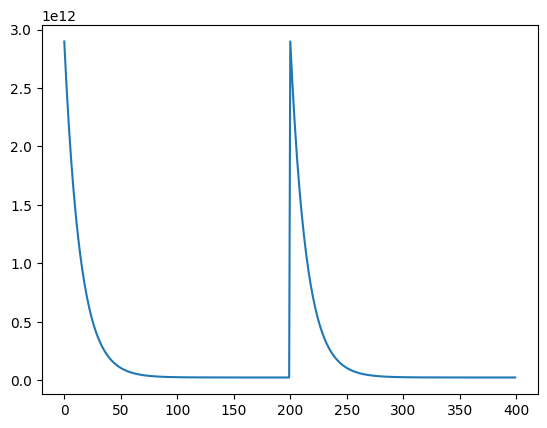

In [281]:
plt.plot(errors_1);

#### Full-Bath (lr=0.0005)

In [282]:
#змінні
lr_2 = 0.0005
epochs_2 = 600

#розрахунок параметрів
m, b, errors_2 = full_batch_gradient_descent(X, y, lr_2, epochs_2)
predictions_fbgd_m = m * X[:, 0] + b

# Виводимо коефіцієнти моделі
print("Прогноз моделі:", predictions_fbgd)
print("Коефіцієнт нахилу:", m)
print("Вільний член:", b)
print("RMSE для Full-Bath:", rmse (y, predictions_fbgd_m))

Прогноз моделі: [3366.49158148 5777.07796487 6982.37115657 ... 3366.49158148 3366.49158148
 4089.6674965 ]
Коефіцієнт нахилу: 243.70058896361152
Вільний член: -1045.5529121368702
RMSE для Full-Bath: 4675.774041321836


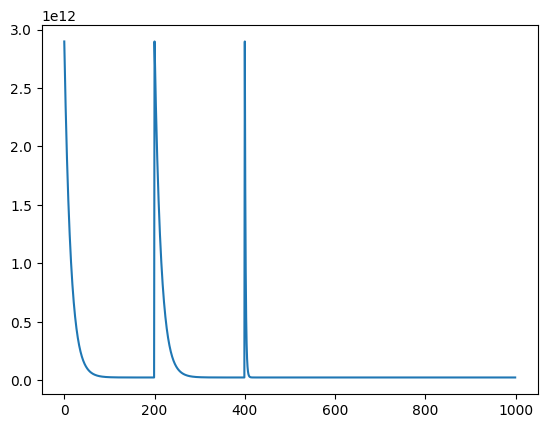

In [283]:
plt.plot(errors_2);

#### Full-Bath (lr=0.000005)

In [284]:
#змінні
lr_2 = 0.000005
epochs_2 = 200

#розрахунок параметрів
m, b, errors_3 = full_batch_gradient_descent(X, y, lr_2, epochs_2)
predictions_fbgd = m * X[:, 0] + b

# Виводимо коефіцієнти моделі
print("Прогноз моделі:", predictions_fbgd)
print("Коефіцієнт нахилу:", m)
print("Вільний член:", b)
print("RMSE для Full-Bath:", rmse (y, predictions_fbgd))

Прогноз моделі: [2729.62311795 4786.69504991 5815.2310159  ... 2729.62311795 2729.62311795
 3346.74469754]
Коефіцієнт нахилу: 205.7071931962608
Вільний член: -973.1063595812601
RMSE для Full-Bath: 4918.72485979142


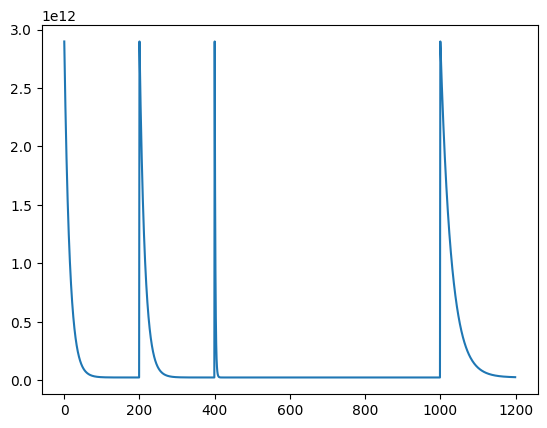

In [285]:
plt.plot(errors_3);

### 1.3 Sklearn

In [116]:
!pip install scikit-learn --quiet

In [286]:
#перетворення у датафрейм
X_df = pd.DataFrame(X)

In [287]:
X_df.shape

(1064, 1)

In [288]:
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [289]:
lin_reg.fit(X_df, y)

LinearRegression()

In [290]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [240]:
predictions_sklearn = lin_reg.predict(X_df)

In [291]:
# Виводимо коефіцієнти моделі
print("Прогноз моделі:", predictions_sklearn)
print("Коефіцієнт нахилу:", lin_reg.coef_)
print("Вільний член:", lin_reg.intercept_)
print("RMSE для sklearn:", rmse (y, predictions_sklearn))

Прогноз моделі: [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
Коефіцієнт нахилу: [267.24891283]
Вільний член: -2091.4205565650864
RMSE для sklearn: 4662.505766636395


###Візуалізація

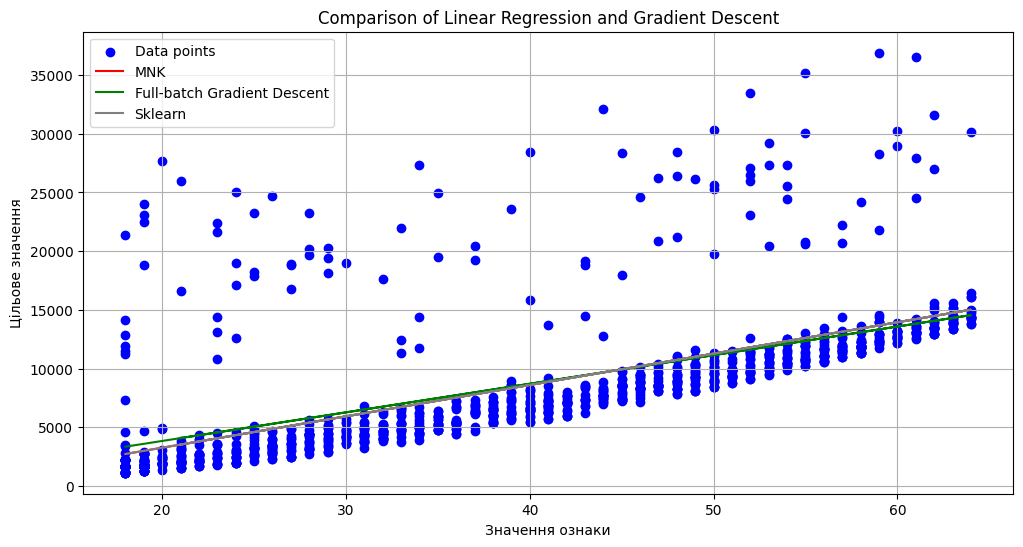

In [292]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd_m, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

**Відповідь:**
1. Графіки моделей є майже ідентичними і частково накладаються.
2. Моїм найкращим значенням при візуальному підборі були параметри w = 290, b = -3300 з rmse=4683.
За результатами застосування функцій найкращим став результат rmse=4662.505766636395.(sklearn, MNK)

#Завдання 2

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [300]:
fig = px.scatter(smoker_df,
                 x='age',
                 y='charges',
                 opacity=0.8,
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [293]:
#змінні для курців:
Xs = smoker_df['age']
X_sm =  np.expand_dims(Xs.to_numpy(),axis=1)
y_sm = smoker_df['charges']

In [294]:
lin_reg.fit(X_sm, y_sm)

LinearRegression()

In [295]:
lin_reg.coef_, lin_reg.intercept_

(array([305.23760211]), 20294.128126915966)

In [296]:
predictions_sklearn_sm = lin_reg.predict(X_sm)

In [298]:
# Виводимо коефіцієнти моделі lkz rehwsd
print("Прогноз моделі:", predictions_sklearn)
print("Коефіцієнт нахилу:", lin_reg.coef_)
print("Вільний член:", lin_reg.intercept_)
print("RMSE для sklearn:", rmse (y_sm, predictions_sklearn_sm))

Прогноз моделі: [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
Коефіцієнт нахилу: [305.23760211]
Вільний член: 20294.128126915966
RMSE для sklearn: 10711.00334810241


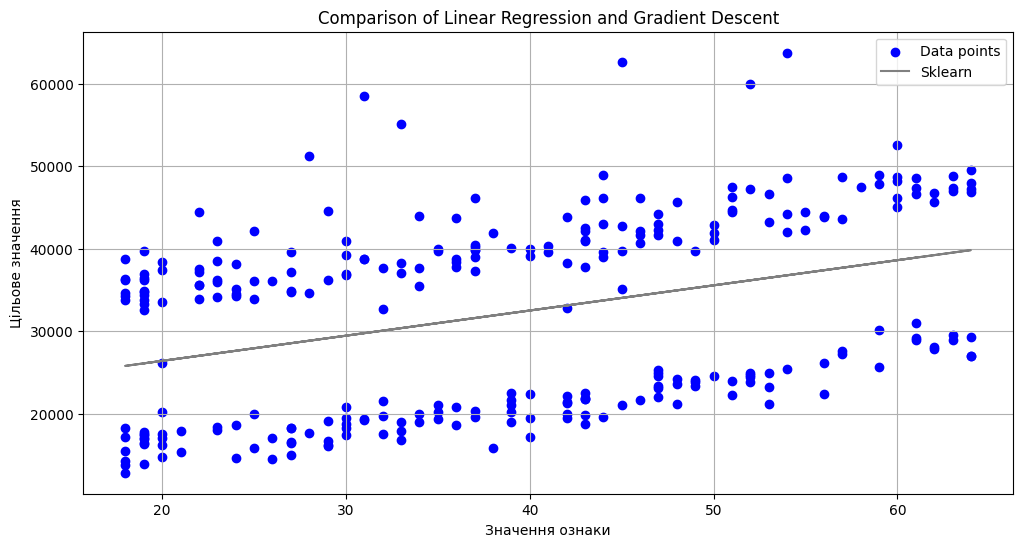

In [299]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X_sm[:, 0], y_sm, color='blue', label='Data points')
plt.plot(X_sm[:, 0], predictions_sklearn_sm, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

**Відповідь:**
Як можемо бачити з візуалізації залежність між віком та розміром внесків є, але це 2 паралельні залежності. Оскільки ми будуємо 1 функцію, а данні зосередженні на двох прямих поза нею, то модельне відображає тенденції, що склалися.
ВВажаю, що таку модель не доцільно використовувати в бізнесі. бо при застосуванні до клієнтів, які вище нашої функції - компанія нестиме втрати, а щодо клієнтів, які відповідатимуть портрету клієнта нижче функціїї - ми не запопонуємо конкурентну плату за послуги.